# Importing Libraries 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# Loading Dataset

### Loading fMRI Responses

In [3]:
import tables 
from scipy.io import loadmat

The PyTables library is used to open .mat files which is the format of the dataset

SciPY library is used for input/output functions for scientic data such as .mat files. loadmat() is used to import .mat files for < v7.2

In [6]:
f = tables.open_file('/Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/EstimatedResponses.mat')
for node in f:
    print(node)


/ (RootGroup) ''
/dataTrnS1 (CArray(1750, 25915)zlib(3)) ''
/dataTrnS2 (CArray(1750, 26329)zlib(3)) ''
/dataValS1 (CArray(120, 25915)zlib(3)) ''
/dataValS2 (CArray(120, 26329)zlib(3)) ''
/roiS1 (CArray(1, 25915)zlib(3)) ''
/roiS2 (CArray(1, 26329)zlib(3)) ''
/voxIdxS1 (CArray(1, 25915)zlib(3)) ''
/voxIdxS2 (CArray(1, 26329)zlib(3)) ''


.mat files use a format called HDF5 which stores files in a hiearchial structure. 
to open .mat files we use .open_file function from PyTables Library
I have listed all the nodes present in first level of the file here

In [7]:
responses = f.get_node('/dataTrnS1')[:]
print(responses.shape)
roi = f.get_node('/roiS1')[:].flatten()
print(roi.shape)

(1750, 25915)
(25915,)


Here we are taking Training data of Subject 1 through DataTrnS1 which contains reponses of fMRI for subject 1
Other folders corresponds to Training data for subject 2
Validation sets for subject 1 and 2
ROIS1, ROIS2 corresponds to Region of Intrest labels for each Voxel of the brain - Explains which brain region each voxel belongs to 
voxIdxS1,voxIdxS2 - These are the 3D cooridinate of each voxel, this can be helpful to reconstruct the 3D brain of the subject

In [8]:
v1_v2_v3_idx = np.where(np.isin(roi,[1,2,3]))[0]
print(len(v1_v2_v3_idx))
filtered_reponses = responses[:,v1_v2_v3_idx]
print(filtered_reponses.shape)

5512
(1750, 5512)


The paper only uses Voxels 1 to 3 which are associated with simple visual like Edges,Shapes and Textures.
We only use 5512 voxels out of 25,000 that the dataset contains

### Loading Visual Sitmuli/ Image

In [9]:
stim = loadmat('/Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli.mat')
stimuli = stim['stimTrn']
seqTrn= stim['seqTrn'].flatten()
print(stimuli.shape)
print(stim.keys())

(1750, 128, 128)
dict_keys(['__header__', '__version__', '__globals__', 'stimTrn', 'stimVal', 'seqTrn', 'seqVal'])


As stimuli.mat is >v7.2 we have to import it by SciPy's loadmat function which outputs a python's dictionary. 
It contains stimTrn which is the training set 
stimVal contains Validation set 
SeqTrn and seqVal contain what image was shown at which time step 

### Visualizing the dataset

#### Image

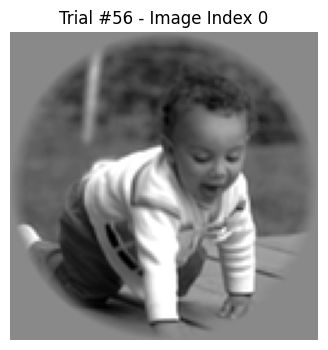

In [10]:
trial_index = 55
image_index = seqTrn[trial_index]
plt.figure(figsize=(4,4))
plt.imshow(stimuli[image_index],cmap='gray')
plt.title(f"Trial #{trial_index + 1} - Image Index {image_index}")
plt.axis("off")
plt.show()

#### Voxel

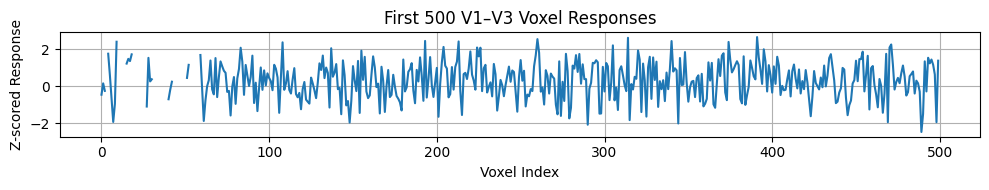

In [11]:
voxel_response = filtered_reponses[trial_index]  # brain response at this trial
plt.figure(figsize=(10, 2))
plt.plot(voxel_response[:500])  # Plot first 500 voxels
plt.title("First 500 V1–V3 Voxel Responses")
plt.xlabel("Voxel Index")
plt.ylabel("Z-scored Response")
plt.grid(True)
plt.tight_layout()
plt.show()

## Encoding Labels into images


We will try to ecode the 1870 images using openAI clip, we will try to do this to full res images


In [17]:
import tables
import numpy as np

# === Step 1: List all filenames ===
file_list = [f"/Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_{i:02d}.mat" for i in range(1, 16)]
full_images = []

for file_path in file_list:
    print(f"Reading {file_path}")
    f = tables.open_file(file_path)

    data = f.get_node('/stimTrn')[:]  # actual key name from your output
    # data shape: (500, 500, 120) → 120 images of size 500×500

    # Rearrange: (H, W, N) → (N, H, W)
    data = np.transpose(data, (2, 0, 1))  # → (120, 500, 500)
    full_images.append(data)

    f.close()

# Concatenate all blocks
full_images = np.concatenate(full_images, axis=0)  # → (1750, 500, 500)
print("Final shape:", full_images.shape)


Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_01.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_02.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_03.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_04.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_05.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_06.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_07.mat
Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_08.mat
Reading /Users/harshakhiyani/My_Stuff/St

In [15]:
file_path = "/Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_01.mat"
file_list = [f"/Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_{i:02d}.mat" for i in range(1, 16)]
for file_path in file_list:
    f = tables.open_file(file_path)
    print(f"Reading {file_path}")

    # Inspect node names once
    print(f.list_nodes("/"))

    # Try loading correct key (e.g., change from 'stim' → actual key)
    data = f.get_node('/images')[:]  # replace with correct one
    data = np.transpose(data, (3, 0, 1, 2))  # → (N, 512, 512, 3)
    full_images.append(data)
    f.close()

Reading /Users/harshakhiyani/My_Stuff/Study/Research/Visual Stimiluai Reconstruction/Dataset/Stimuli_Trn_FullRes_01.mat
[/stimTrn (CArray(500, 500, 120)zlib(3)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (125, 1, 120)]


NoSuchNodeError: group ``/`` does not have a child named ``/images``